+ country - страна-производитель вина
+ description - подробное описание
+ designation - название виноградника, где выращивают виноград для вина
+ points - количество баллов, которое WineEnthusiast оценил вино по шкале от 1 до 100
+ price - стоимость бутылки вина
+ province - провинция или штат 
+ region_1 - винодельческий район в провинции или штате (например, Напа)
+ region_2 - конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например, Резерфорд в долине Напа), но это значение иногда может быть пустым.
+ taster_name - имя дегустатора
+ taster_twitter_handle - твиттер дегустатора
+ title - название вина, который часто содержит годи др подробную информацию
+ variety -  сорт винограда, из которого изготовлено вино (например, Пино Нуар).
+ winery - винодельня, которая производила вино

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('data/wine.csv')
data.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [3]:
data['taster_name'].nunique()

19

In [4]:
data['price'].max()

np.float64(3300.0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [6]:
data[data.duplicated()]
print(f'Число найденных дубликатов: {data[data.duplicated()].shape[0]}')

Число найденных дубликатов: 9983


In [7]:
data = data.drop_duplicates()
data.shape[0]

119988

In [8]:
data.isnull().sum()

country                     59
description                  0
designation              34545
points                       0
price                     8395
province                    59
region_1                 19560
region_2                 73219
taster_name              24917
taster_twitter_handle    29446
title                        0
variety                      1
winery                       0
dtype: int64

<Axes: >

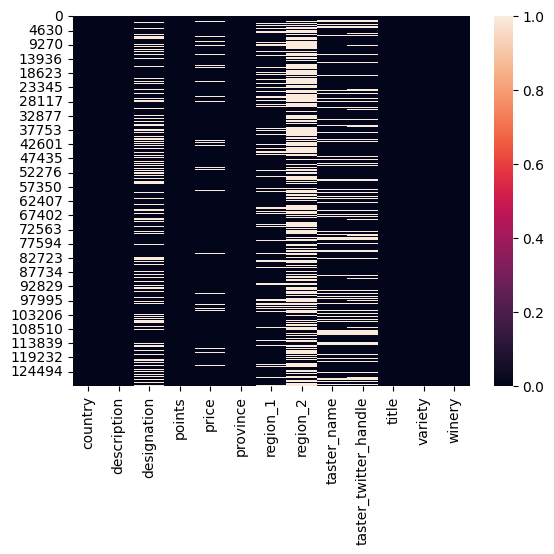

In [9]:
sns.heatmap(data.isnull())

In [10]:
thresh = data.shape[0] * 0.7
data = data.dropna(axis=1, thresh=thresh)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 119988 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   taster_name            95071 non-null   object 
 8   taster_twitter_handle  90542 non-null   object 
 9   title                  119988 non-null  object 
 10  variety                119987 non-null  object 
 11  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


<Axes: >

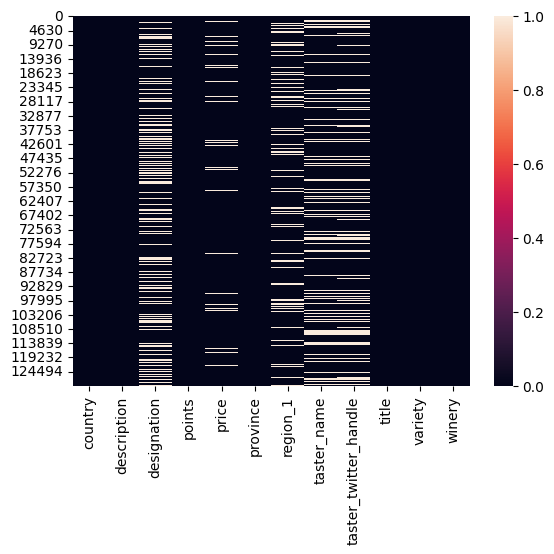

In [11]:
sns.heatmap(data.isnull()) # смотрим, какие признаки остались

In [12]:
data.describe(include='all')

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
count,119929,119988,85443,119988.000000,111593.000000,119929,100428,95071,90542,119988,119987,119988
unique,43,119955,37979,NaN,NaN,425,1229,19,15,118840,707,16757
top,US,"Aromas of citrus, melon and orange blossom sta...",Reserve,NaN,NaN,California,Napa Valley,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,50457,2,1871,NaN,NaN,33656,4174,23560,23560,9,12278,211
mean,NaN,NaN,NaN,88.442236,35.620747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.092915,42.103728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# обрабатываем пропуски в категориальных признаках самым простым вариантом, замена на unknown

data['designation'] = data['designation'].fillna('unknown')
data['region_1'] = data['region_1'].fillna('unknown')
data['taster_name'] = data['taster_name'].fillna('unknown')
data['taster_twitter_handle'] = data['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения

data['country'] = data['country'].fillna('US')
data['price'] = data['price'].fillna(data['price'].mean())
data['province'] = data['province'].fillna('California')
data['variety'] = data['variety'].fillna('Pinot Noir')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119988 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119988 non-null  object 
 1   description            119988 non-null  object 
 2   designation            119988 non-null  object 
 3   points                 119988 non-null  int64  
 4   price                  119988 non-null  float64
 5   province               119988 non-null  object 
 6   region_1               119988 non-null  object 
 7   taster_name            119988 non-null  object 
 8   taster_twitter_handle  119988 non-null  object 
 9   title                  119988 non-null  object 
 10  variety                119988 non-null  object 
 11  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


In [15]:
# в числовом признаке выберем метод замены средним значением

data['price'] = data['price'].fillna(data['price'].mean())

<Axes: >

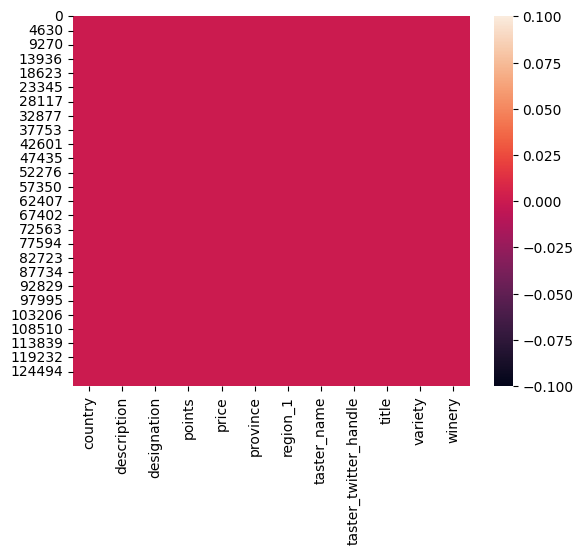

In [16]:
sns.heatmap(data.isnull()) # убеждаемся, что датасет без пропусков

In [17]:
data = data.to_csv('wine_cleared.csv', index=False)

In [18]:
from ydata_profiling import ProfileReport

In [19]:
df = pd.read_csv('data/wine.csv')

In [20]:
# profile = ProfileReport(df, title="Pandas Profiling Report")

#profile

In [21]:
#profile.to_file("your_report.html")

In [22]:
import sweetviz as sv

In [23]:
# report = sv.analyze(df)
# report.show_html()

In [24]:
import dtale

df = pd.read_csv('data/wine.csv')

In [25]:
d = dtale.show(df)
d

In [26]:
df = pd.read_csv('data/wine_cleared.csv')

In [27]:
df['price'].min()

np.float64(4.0)

In [28]:
import statistics

In [29]:
round(statistics.mean(df['price']), 2)

35.36

In [30]:
mean = df['price'].sum() / len(df['price'])

In [31]:
median = statistics.median(df['price'])
median

28.0

In [32]:
df_sorted = df['price'].sort_values().reset_index(drop=True)
n = len(df_sorted)
if n % 2 == 1:
    median = df_sorted.iloc[n // 2]
else:
    median = (df_sorted.iloc[n // 2 - 1] + df_sorted.iloc[n // 2]) / 2
    
print(f"Медианная стоимость бутылки вина: {median} руб.")

Медианная стоимость бутылки вина: 28.0 руб.


In [33]:
mode = round(statistics.mode(df['price']), 2)
mode

35.36

In [34]:
mode = round(df['price'].value_counts().index[0], 2)
mode

np.float64(35.36)

In [37]:
df.corr(numeric_only=True)

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.007124,0.004652
points,0.007124,1.000000,0.402137
price,0.004652,0.402137,1.000000


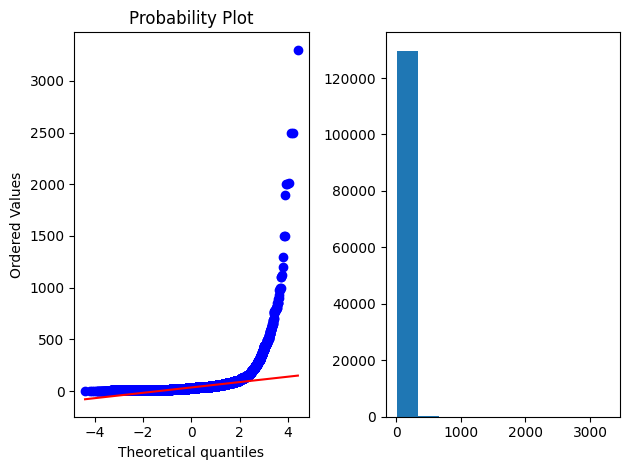

In [38]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

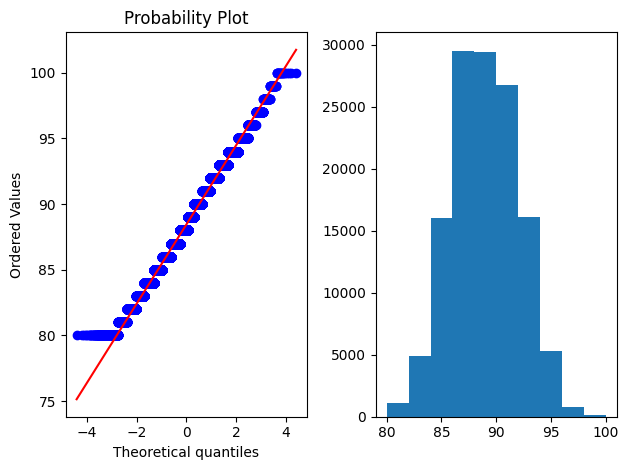

2025-01-08 13:18:42,078 - INFO     - Executing shutdown due to inactivity...
2025-01-08 13:18:46,201 - INFO     - Executing shutdown...
2025-01-08 13:18:46,205 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [39]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

In [49]:
spearman_corr = round(df['points'].corr(df['price'], method='spearman'), 2)
spearman_corr

np.float64(0.58)

In [45]:
kendall_corr = round(df['points'].corr(df['price'], method='kendall'), 2)
kendall_corr

np.float64(0.43)

In [52]:
from sklearn.metrics import matthews_corrcoef

In [53]:
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

np.float64(-0.3333333333333333)